In [2]:
! mkdir rock_scissor_paper
! mkdir rock_scissor_paper/scissor
! mkdir rock_scissor_paper/rock
! mkdir rock_scissor_paper/paper

! ls -l rock_scissor_paper/

total 12
drwxr-xr-x 2 root root 4096 Jan 11 08:24 paper
drwxr-xr-x 2 root root 4096 Jan 11 08:24 rock
drwxr-xr-x 2 root root 4096 Jan 11 08:24 scissor


In [17]:
# 코드로 zip 압축 풀기
!unzip -uq "/content/rock_scissor_paper/paper/paper.zip" -d "/content/rock_scissor_paper/paper"
!unzip -uq "/content/rock_scissor_paper/rock/rock.zip" -d "/content/rock_scissor_paper/rock"
!unzip -uq "/content/rock_scissor_paper/scissor/scissor.zip" -d "/content/rock_scissor_paper/scissor"

#! cd  /content/rock_scissor_paper/paper
#!unzip paper.zip

#! cd  /content/rock_scissor_paper/rock
#!unzip rock.zip

#! cd  /content/rock_scissor_paper/scissor
#!unzip scissor.zip

# 압축 해제 명령어 : unzip <파일명>.zip

In [27]:
#데이터 불러오기 + Resize 하기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

#model=keras.models.Sequential()
#model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
#model.add(keras.layers.MaxPool2D(2,2))
#model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
#model.add(keras.layers.MaxPooling2D((2,2)))
#model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(n_dense, activation='relu'))
#model.add(keras.layers.Dense(10, activation='softmax'))

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [28]:
from PIL import Image
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/rock_scissor_paper/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

181  images to be resized.
181  images resized.
가위 이미지 resize 완료!


In [29]:
#바위 축소
image_dir_path = '/content/rock_scissor_paper/rock'
resize_images(image_dir_path)

def resize_image(image_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    
    target_size(28, 28)
    for img in image:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")
    
print("바위 이미지 resize 완료!")

154  images to be resized.
154  images resized.
바위 이미지 resize 완료!


In [30]:
#보 이미지 축소
image_dir_path = '/content/rock_scissor_paper/paper'
resize_images(image_dir_path)

def resize_image(image_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    
    target_size(28, 28)
    for img in image:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")
    
print("보 이미지 resize 완료!")

180  images to be resized.
180  images resized.
보 이미지 resize 완료!


In [31]:
#학습데이터
import numpy as np

def load_data(img_path, number_of_data=515):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 515 입니다.
x_train shape: (515, 28, 28, 3)
y_train shape: (515,)


라벨:  0


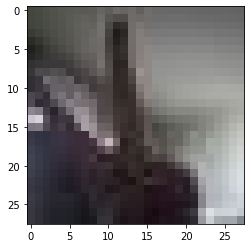

In [32]:
#이미지 불러와보기
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [33]:
#딥러닝 네트워크 설계
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random 

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [37]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))


x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.


print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

Before Reshape - x_train_norm shape: (515, 28, 28, 3)
After Reshape - x_train_reshaped shape: (515, 28, 28, 3)


In [38]:
#딥러닝 학습시키기
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
17/17 [==============================] - 1s 19ms/step - loss: 1.7293 - accuracy: 0.3728
Epoch 2/10
17/17 [==============================] - 0s 19ms/step - loss: 0.7347 - accuracy: 0.7398
Epoch 3/10
17/17 [==============================] - 0s 19ms/step - loss: 0.3692 - accuracy: 0.8816
Epoch 4/10
17/17 [==============================] - 0s 19ms/step - loss: 0.1695 - accuracy: 0.9476
Epoch 5/10
17/17 [==============================] - 0s 19ms/step - loss: 0.1008 - accuracy: 0.9670
Epoch 6/10
17/17 [==============================] - 0s 19ms/step - loss: 0.1095 - accuracy: 0.9592
Epoch 7/10
17/17 [==============================] - 0s 20ms/step - loss: 0.0382 - accuracy: 0.9922
Epoch 8/10
17/17 [==============================] - 0s 19ms/step - loss: 0.0201 - accuracy: 0.9981
Epoch 9/10
17/17 [==============================] - 0s 19ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 10/10
17/17 [==============================] - 0s 19ms/step - loss: 0.0103 - accuracy: 1.0000


In [40]:
#테스트
!mkdir rock_scissor_paper/test
!mkdir rock_scissor_paper/test/paper_test
!mkdir rock_scissor_paper/test/rock_test
!mkdir rock_scissor_paper/test/scissor_test

In [41]:
#테스트 압축풀기
!unzip -uq "/content/rock_scissor_paper/test/paper_test/paper_test.zip" -d "/content/rock_scissor_paper/test/paper_test"
!unzip -uq "/content/rock_scissor_paper/test/rock_test/rock_test.zip" -d "/content/rock_scissor_paper/test/rock_test"
!unzip -uq "/content/rock_scissor_paper/test/scissor_test/scissor_test.zip" -d "/content/rock_scissor_paper/test/scissor_test"

In [48]:
#테스트셋 확인
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/rock_scissor_paper/test/scissor_test'
resize_images(image_dir_path)

print("가위 test resize 완료!")


image_dir_path = '/content/rock_scissor_paper/test/rock_test'
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("바위 test resize 완료!")

image_dir_path = '/content/rock_scissor_paper/test/paper_test'
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("보 test resize 완료!")


def load_data(img_path, number_of_data=4747):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/rock_scissor_paper/test'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/300.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

1655  images to be resized.
1655  images resized.
가위 test resize 완료!
1503  images to be resized.
1503  images resized.
바위 test resize 완료!
1589  images to be resized.
1589  images resized.
보 test resize 완료!
테스트데이터(x_train)의 이미지 개수는 4747 입니다.
x_test shape: (4747, 28, 28, 3)
y_test shape: (4747,)


라벨:  0


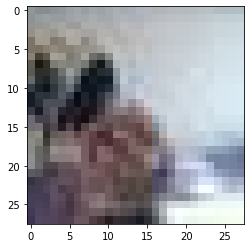

In [54]:
#테스트 이미지 불러오기
import matplotlib.pyplot as plt
plt.imshow(x_test[430])
print('라벨: ', y_test[430])

In [55]:
#모델 정확도 측정
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

149/149 - 1s - loss: 2.2995 - accuracy: 0.3050 - 1s/epoch - 9ms/step
test_loss: 2.2994649410247803 
test_accuracy: 0.3050347566604614
